**Machine Learning**

**Individual Take-Home Assignment**

**206091D - K.A.D.H.L.M. Perera**

**Data Exploration and Preprocessing**

In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Load the dataset
dataset = pd.read_csv('/content/Frogs_MFCCs.csv')

In [3]:
# Display the first few rows of the dataset
print(dataset.head())


   MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0       1.0  0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945   
1       1.0  0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835   
2       1.0  0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714   
3       1.0  0.224392  0.118985  0.329432  0.372088  0.361005  0.015501   
4       1.0  0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884   

   MFCCs_ 8  MFCCs_ 9  MFCCs_10  ...  MFCCs_17  MFCCs_18  MFCCs_19  MFCCs_20  \
0 -0.150063 -0.171128  0.124676  ... -0.108351 -0.077623 -0.009568  0.057684   
1 -0.222475 -0.207693  0.170883  ... -0.090974 -0.056510 -0.035303  0.020140   
2 -0.242234 -0.219153  0.232538  ... -0.050691 -0.023590 -0.066722 -0.025083   
3 -0.194347 -0.098181  0.270375  ... -0.136009 -0.177037 -0.130498 -0.054766   
4 -0.265423 -0.172700  0.266434  ... -0.048885 -0.053074 -0.088550 -0.031346   

   MFCCs_21  MFCCs_22           Family      Genus         Species  R

In [ ]:
# Display the structure and summary of the dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7195 entries, 0 to 7194
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MFCCs_ 1  7195 non-null   float64
 1   MFCCs_ 2  7195 non-null   float64
 2   MFCCs_ 3  7195 non-null   float64
 3   MFCCs_ 4  7195 non-null   float64
 4   MFCCs_ 5  7195 non-null   float64
 5   MFCCs_ 6  7195 non-null   float64
 6   MFCCs_ 7  7195 non-null   float64
 7   MFCCs_ 8  7195 non-null   float64
 8   MFCCs_ 9  7195 non-null   float64
 9   MFCCs_10  7195 non-null   float64
 10  MFCCs_11  7195 non-null   float64
 11  MFCCs_12  7195 non-null   float64
 12  MFCCs_13  7195 non-null   float64
 13  MFCCs_14  7195 non-null   float64
 14  MFCCs_15  7195 non-null   float64
 15  MFCCs_16  7195 non-null   float64
 16  MFCCs_17  7195 non-null   float64
 17  MFCCs_18  7195 non-null   float64
 18  MFCCs_19  7195 non-null   float64
 19  MFCCs_20  7195 non-null   float64
 20  MFCCs_21  7195 non-null   floa

In [ ]:
#see how many unique values for each col
dataset.nunique()

MFCCs_ 1     249
MFCCs_ 2    7140
MFCCs_ 3    7026
MFCCs_ 4    7175
MFCCs_ 5    7195
MFCCs_ 6    7195
MFCCs_ 7    7195
MFCCs_ 8    7195
MFCCs_ 9    7195
MFCCs_10    7195
MFCCs_11    7195
MFCCs_12    7195
MFCCs_13    7195
MFCCs_14    7195
MFCCs_15    7195
MFCCs_16    7195
MFCCs_17    7195
MFCCs_18    7195
MFCCs_19    7195
MFCCs_20    7195
MFCCs_21    7195
MFCCs_22    7195
Family         4
Genus          8
Species       10
RecordID      60
dtype: int64

In [ ]:
dataset.describe()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
count,7.195000e+03,7.195000e+03,7.195000e+03,7.195000e+03,7.195000e+03,7.195000e+03,7.195000e+03,7.195000e+03,7.195000e+03,7.195000e+03,...,7.195000e+03,7.195000e+03,7195.000000,7.195000e+03,7.195000e+03,7.195000e+03,7195.000000,7195.000000,7195.000000,7195.000000
mean,-3.476178e-16,1.580081e-16,-3.160162e-17,-3.318170e-16,-9.480487e-17,-6.320325e-17,-1.580081e-17,6.320325e-17,-7.900406e-17,3.950203e-17,...,9.480487e-17,4.740243e-17,0.000000,3.160162e-17,4.740243e-17,6.320325e-17,2.520083,1.255733,2.401529,25.220014
std,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,...,1.000069e+00,1.000069e+00,1.000069,1.000069e+00,1.000069e+00,1.000069e+00,0.676037,1.734515,2.179178,13.214399
min,-1.798363e+01,-4.558260e+00,-2.835774e+00,-5.730376e+00,-4.689655e+00,-4.222105e+00,-3.136579e+00,-4.954132e+00,-3.997445e+00,-7.933425e+00,...,-3.695589e+00,-9.053491e+00,-7.648086,-3.274841e+00,-5.891010e+00,-3.782383e+00,0.000000,0.000000,0.000000,1.000000
25%,1.465779e-01,-7.210034e-01,-6.556853e-01,-6.815309e-01,-4.629605e-01,-7.089302e-01,-7.254735e-01,-5.394838e-01,-6.903220e-01,-4.495243e-01,...,-6.551746e-01,-5.886854e-01,-0.685797,-7.191665e-01,-6.912932e-01,-7.051159e-01,2.000000,0.000000,1.000000,15.000000
50%,1.465779e-01,-9.787851e-02,-1.388897e-01,2.212265e-01,2.108925e-01,-2.147770e-01,-2.989222e-01,1.172461e-01,3.413695e-01,5.885357e-02,...,1.745001e-01,4.797713e-02,-0.038187,-2.055943e-02,-7.600078e-02,1.442491e-01,3.000000,0.000000,1.000000,22.000000
75%,1.465779e-01,6.539691e-01,4.533826e-01,7.102452e-01,5.872096e-01,6.479695e-01,5.074717e-01,6.490242e-01,7.663936e-01,4.856939e-01,...,8.203901e-01,6.389138e-01,0.675971,5.796250e-01,6.582274e-01,8.689013e-01,3.000000,3.000000,4.000000,37.000000
max,1.465779e-01,3.093771e+00,2.613861e+00,3.455684e+00,3.842395e+00,7.194984e+00,5.842724e+00,4.747728e+00,3.406890e+00,3.672732e+00,...,4.291889e+00,7.156018e+00,7.556147,5.533108e+00,4.435742e+00,2.792111e+00,3.000000,7.000000,9.000000,60.000000


In [ ]:
# Check again for missing values
print(dataset.isnull().sum())


MFCCs_ 1    0
MFCCs_ 2    0
MFCCs_ 3    0
MFCCs_ 4    0
MFCCs_ 5    0
MFCCs_ 6    0
MFCCs_ 7    0
MFCCs_ 8    0
MFCCs_ 9    0
MFCCs_10    0
MFCCs_11    0
MFCCs_12    0
MFCCs_13    0
MFCCs_14    0
MFCCs_15    0
MFCCs_16    0
MFCCs_17    0
MFCCs_18    0
MFCCs_19    0
MFCCs_20    0
MFCCs_21    0
MFCCs_22    0
Family      0
Genus       0
Species     0
RecordID    0
dtype: int64


In [ ]:
# Initialize LabelEncoders for each categorical feature
label_encoders = {}
for column in ['Family', 'Genus', 'Species']:
    le = LabelEncoder()
    dataset[column] = le.fit_transform(dataset[column])
    label_encoders[column] = le

# Display the first few rows of the dataset after encoding
print(dataset.head())


   MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0  0.146578 -0.780502 -1.581769 -1.529944  1.168666  1.352327  0.597119   
1  0.146578 -0.695439 -1.556680 -1.107634  1.300622  1.415359  0.363097   
2  0.146578 -0.783334 -1.495953 -0.990973  0.915536  0.763498  0.058992   
3  0.146578 -0.453678 -0.729537 -0.727096  1.505993  2.184868  0.098592   
4  0.146578 -1.078343 -1.440441 -0.867225  1.252998  1.255819  0.048313   

   MFCCs_ 8  MFCCs_ 9  MFCCs_10  ...  MFCCs_17  MFCCs_18  MFCCs_19  MFCCs_20  \
0 -1.287190 -1.672333  0.540390  ... -1.427291 -1.007678  0.483477  1.177905   
1 -1.909853 -1.876612  0.903961  ... -1.301412 -0.758490  0.171681  0.779239   
2 -2.079764 -1.940639  1.389091  ... -1.009606 -0.369957 -0.208962  0.299030   
3 -1.667990 -1.264799  1.686808  ... -1.627648 -2.181026 -0.981638 -0.016165   
4 -2.279164 -1.681117  1.655798  ... -0.996517 -0.717936 -0.473426  0.232532   

   MFCCs_21  MFCCs_22  Family  Genus  Species  RecordID  
0  1.02393

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Identify numerical features (excluding categorical labels)
numerical_features = dataset.drop(columns=['Family', 'Genus', 'Species','RecordID']).columns

# Scale numerical features
dataset[numerical_features] = scaler.fit_transform(dataset[numerical_features])

# Display the first few rows of the dataset after scaling
print(dataset.head())


   MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0  0.146578 -0.780502 -1.581769 -1.529944  1.168666  1.352327  0.597119   
1  0.146578 -0.695439 -1.556680 -1.107634  1.300622  1.415359  0.363097   
2  0.146578 -0.783334 -1.495953 -0.990973  0.915536  0.763498  0.058992   
3  0.146578 -0.453678 -0.729537 -0.727096  1.505993  2.184868  0.098592   
4  0.146578 -1.078343 -1.440441 -0.867225  1.252998  1.255819  0.048313   

   MFCCs_ 8  MFCCs_ 9  MFCCs_10  ...  MFCCs_17  MFCCs_18  MFCCs_19  MFCCs_20  \
0 -1.287190 -1.672333  0.540390  ... -1.427291 -1.007678  0.483477  1.177905   
1 -1.909853 -1.876612  0.903961  ... -1.301412 -0.758490  0.171681  0.779239   
2 -2.079764 -1.940639  1.389091  ... -1.009606 -0.369957 -0.208962  0.299030   
3 -1.667990 -1.264799  1.686808  ... -1.627648 -2.181026 -0.981638 -0.016165   
4 -2.279164 -1.681117  1.655798  ... -0.996517 -0.717936 -0.473426  0.232532   

   MFCCs_21  MFCCs_22  Family  Genus  Species  RecordID  
0  1.02393

**Exploratory Data Analysis (EDA)**

In [ ]:
# Display summary statistics
print(dataset.describe())

           MFCCs_ 1      MFCCs_ 2      MFCCs_ 3      MFCCs_ 4      MFCCs_ 5  \
count  7.195000e+03  7.195000e+03  7.195000e+03  7.195000e+03  7.195000e+03   
mean   2.370122e-17  1.580081e-17 -3.160162e-17 -4.740243e-17 -3.160162e-17   
std    1.000069e+00  1.000069e+00  1.000069e+00  1.000069e+00  1.000069e+00   
min   -1.798363e+01 -4.558260e+00 -2.835774e+00 -5.730376e+00 -4.689655e+00   
25%    1.465779e-01 -7.210034e-01 -6.556853e-01 -6.815309e-01 -4.629605e-01   
50%    1.465779e-01 -9.787851e-02 -1.388897e-01  2.212265e-01  2.108925e-01   
75%    1.465779e-01  6.539691e-01  4.533826e-01  7.102452e-01  5.872096e-01   
max    1.465779e-01  3.093771e+00  2.613861e+00  3.455684e+00  3.842395e+00   

           MFCCs_ 6      MFCCs_ 7      MFCCs_ 8      MFCCs_ 9      MFCCs_10  \
count  7.195000e+03  7.195000e+03  7.195000e+03  7.195000e+03  7.195000e+03   
mean   3.160162e-17 -1.580081e-17 -3.160162e-17 -4.740243e-17 -7.900406e-18   
std    1.000069e+00  1.000069e+00  1.000069e+00  1.

In [ ]:
# Display the distribution of target labels
print(dataset['Family'].value_counts())
print(dataset['Genus'].value_counts())
print(dataset['Species'].value_counts())

Family
3    4420
2    2165
1     542
0      68
Name: count, dtype: int64
Genus
0    4150
3    1593
1     542
2     310
4     270
7     148
5     114
6      68
Name: count, dtype: int64
Species
1    3478
5    1121
0     672
2     542
4     472
3     310
6     270
9     148
7     114
8      68
Name: count, dtype: int64


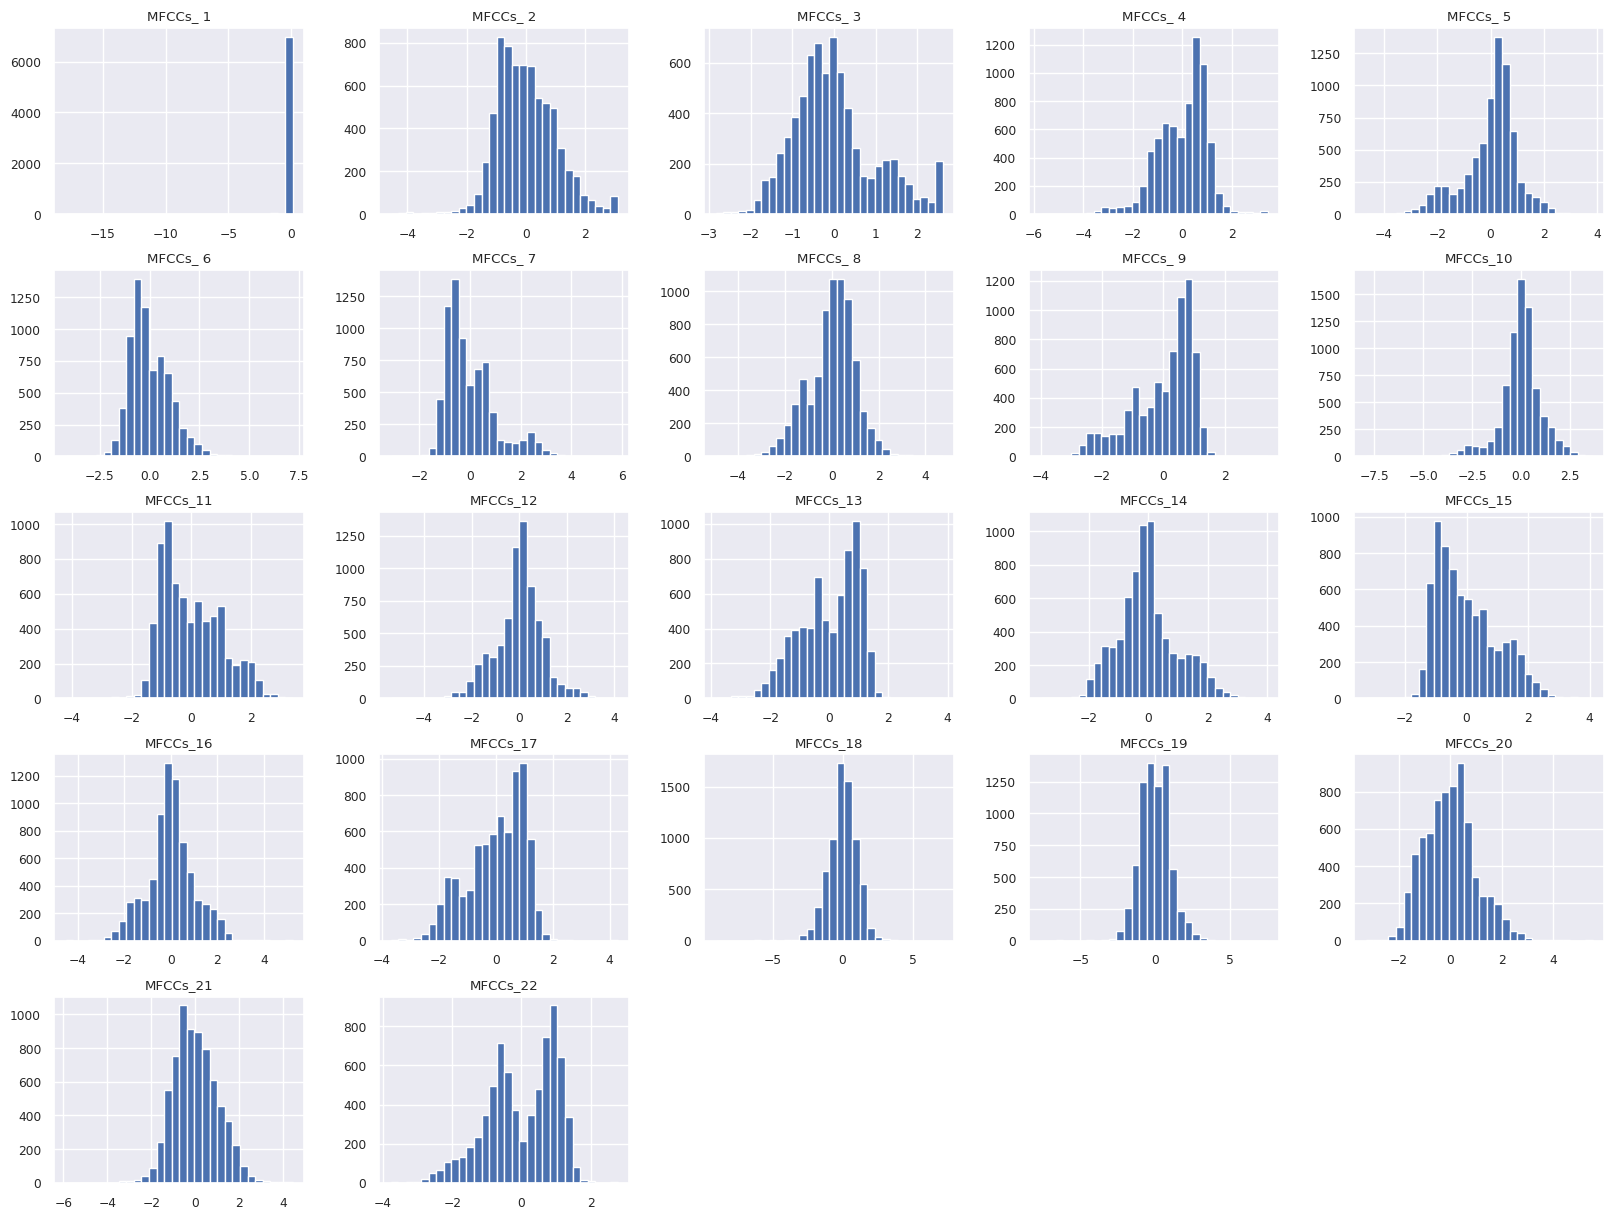

In [ ]:
import matplotlib.pyplot as plt

# Plot histograms of MFCC features
dataset.iloc[:, :-4].hist(bins=30, figsize=(20, 15))
plt.show()

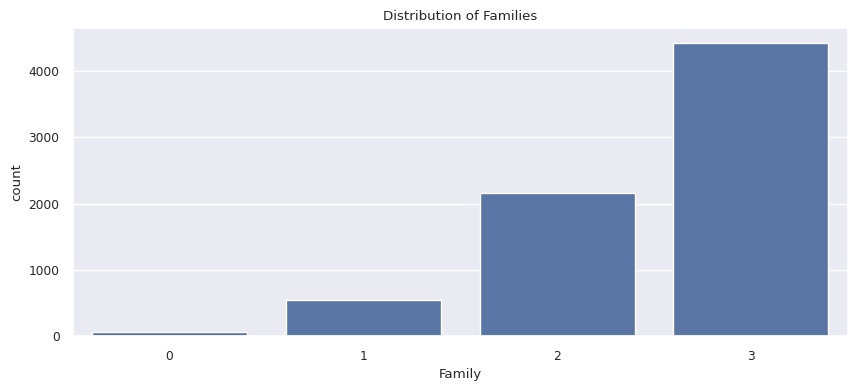

In [ ]:
# Visualize class distributions
plt.figure(figsize=(10, 4))
sns.countplot(x='Family', data=dataset)
plt.title('Distribution of Families')
plt.show()

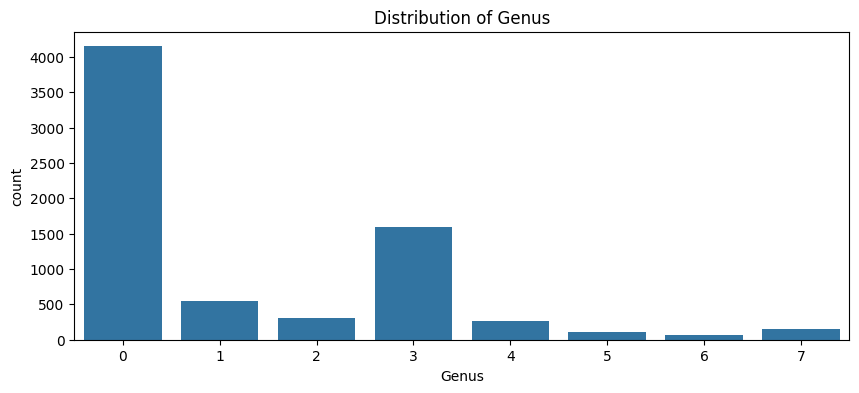

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(x='Genus', data=dataset)
plt.title('Distribution of Genus')
plt.show()

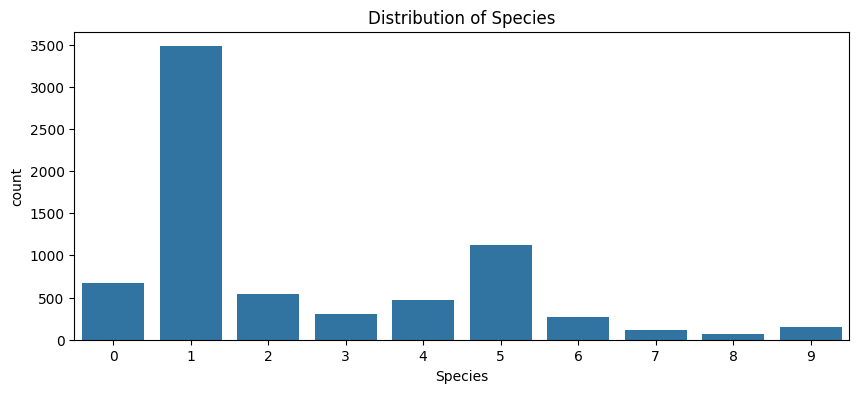

In [ ]:

plt.figure(figsize=(10, 4))
sns.countplot(x='Species', data=dataset)
plt.title('Distribution of Species')
plt.show()

In [ ]:
# Compute the correlation matrix
correlation_matrix = dataset.iloc[:, :-4].corr()


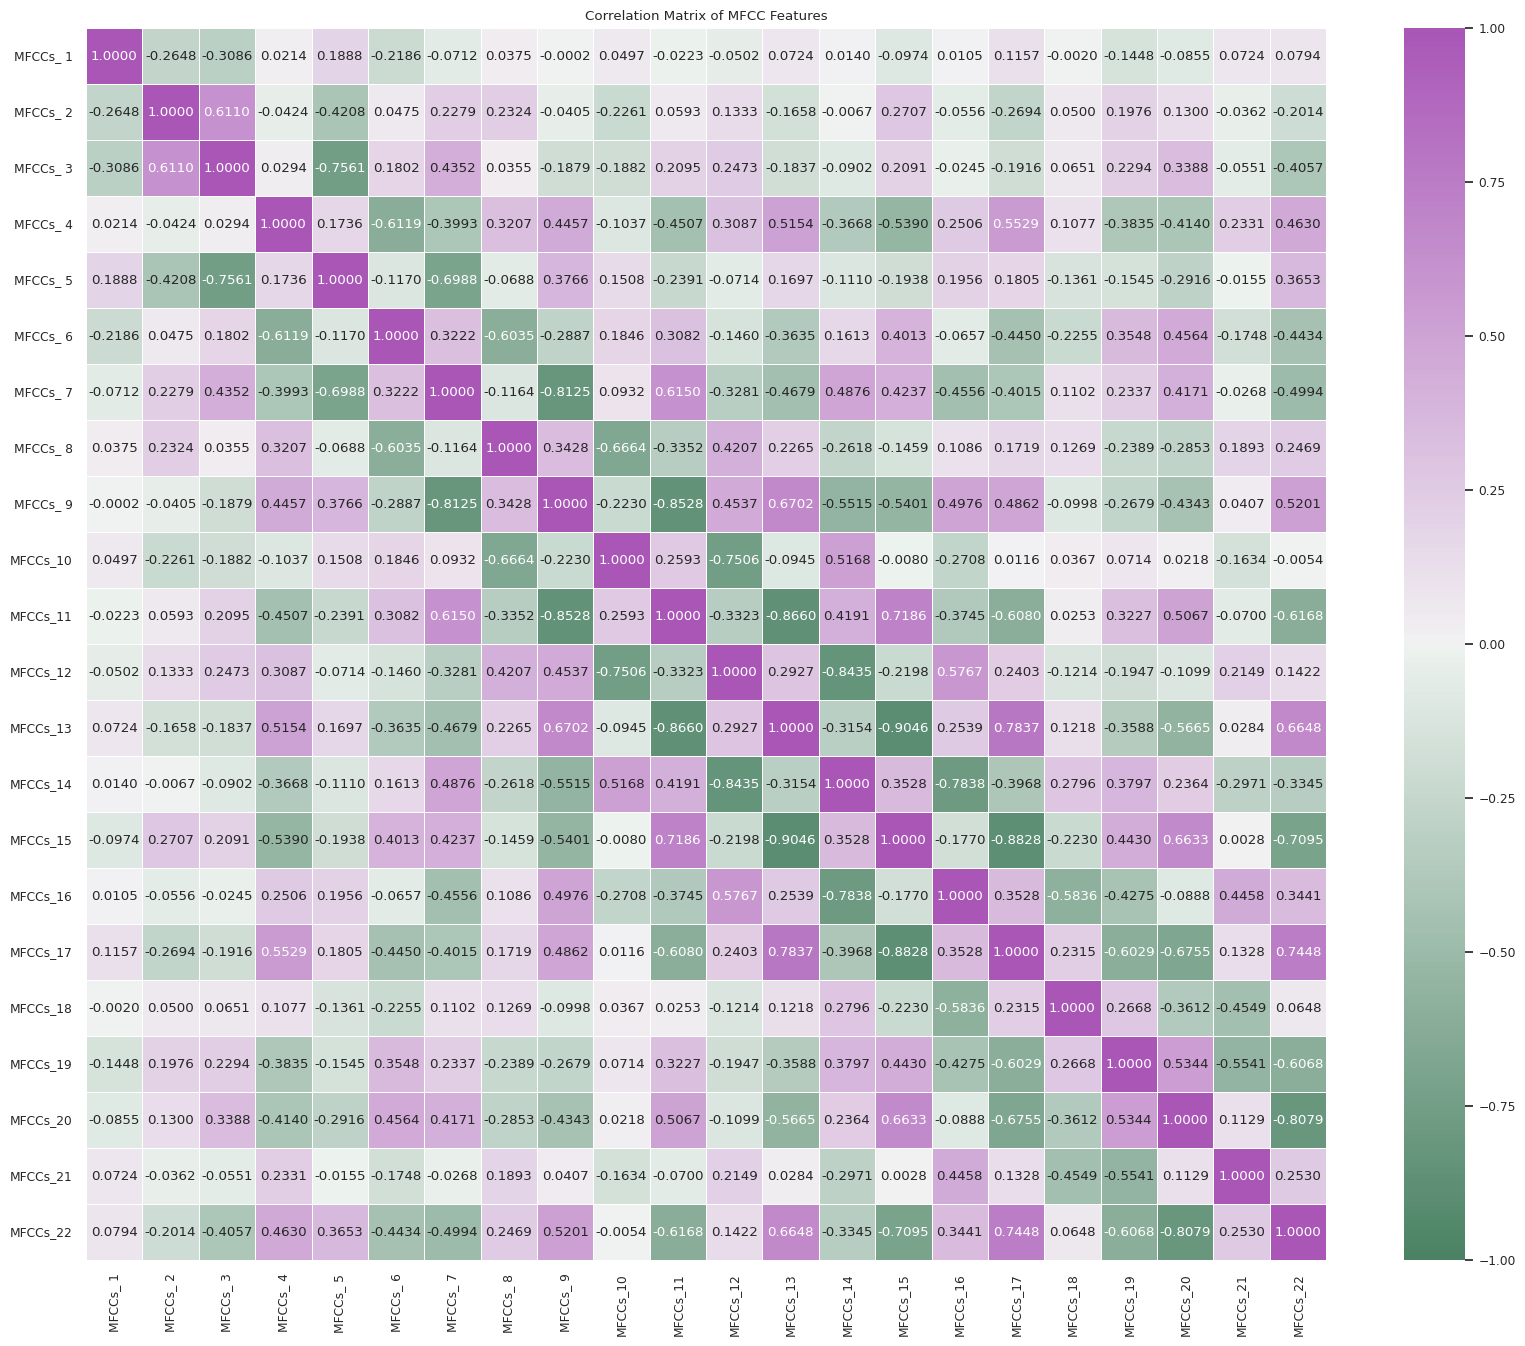

In [ ]:
# Plot the heatmap
sns.set(font_scale=0.8)
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, fmt=".4f",vmin=-1, vmax=1, linewidths=.5, cmap = sns.diverging_palette(145, 300, s=60, as_cmap=True))
plt.title('Correlation Matrix of MFCC Features')
plt.show()

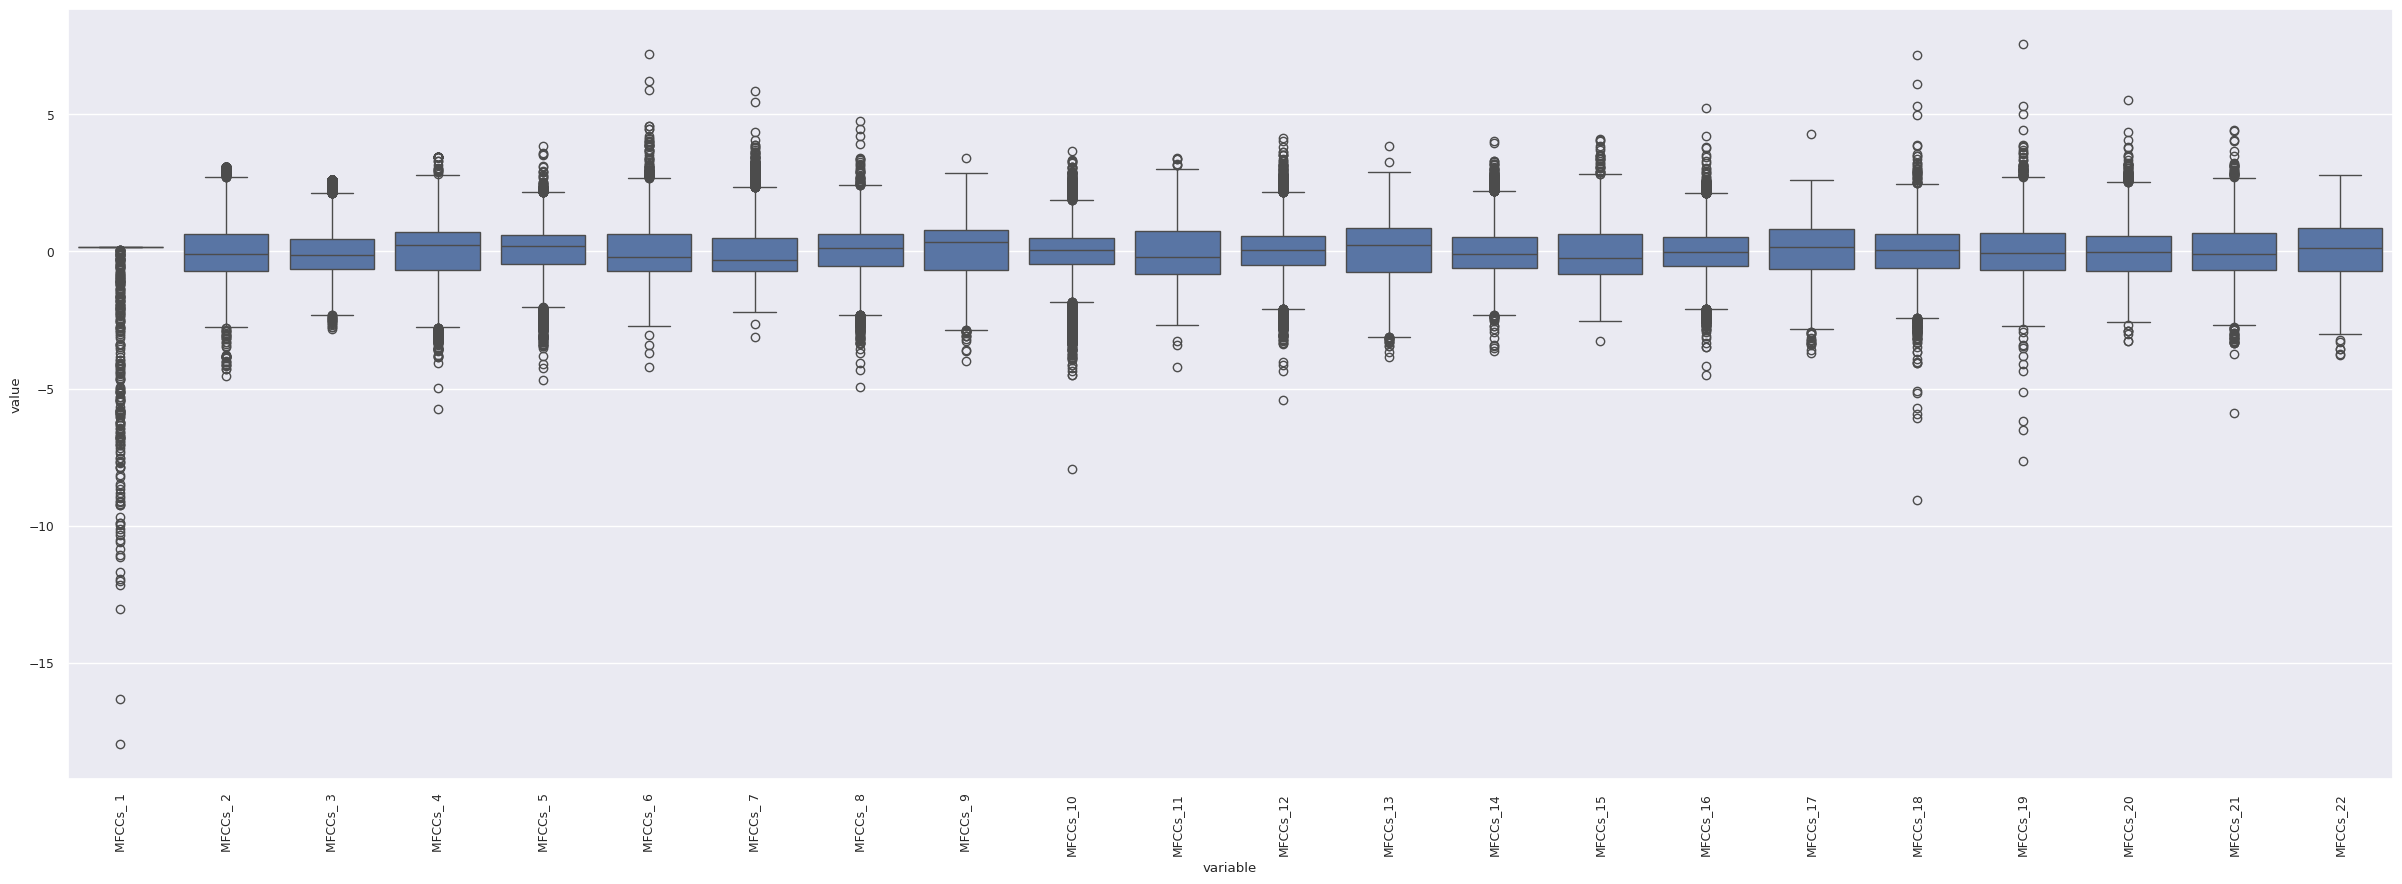

In [ ]:
# display boxlots
plt.figure(figsize=(30,10))
sns.boxplot(x="variable", y="value", data=pd.melt(dataset.iloc[:, :-4]))
plt.xticks(rotation=90)
plt.show()

**Model Selection**

**Classification Models**
1. Random Forest

A powerful ensemble learning technique called Random Forest builds several decision trees during training and aggregates the results to get a final prediction. Our dataset, which generates a high-dimensional feature space with 22 Mel-Frequency Cepstral Coefficients (MFCCs) per instance, is especially well-suited for our approach. Random Forest is a perfect tool for classifying the complex and varied vocalizations of anurans because it is good at managing high-dimensional data and capturing complicated, non-linear correlations between features and labels. Furthermore, Random Forest sheds light on feature importance, enabling us to determine which MFCCs have the greatest impact on the classification of various anuran species. It is a dependable option for our classification task because of its capacity to average numerous decision trees, which also reduces the possibility of overfitting.


2. SVM

Another powerful option for classification problems is Support Vector Machine (SVM). SVM is excellent in locating the ideal hyperplane that maximizes the margin between distinct classes and performs well in high-dimensional spaces. With our dataset, where there are more MFCCs than samples and potential non-linear connections between vocalization variables and anuran species, this feature is especially helpful. Because SVM uses a variety of kernel functions, it can adjust to diverse data distributions, which increases its accuracy and versatility. It is an effective tool for our classification problem because of its great generalization skills, which also guarantee that it performs well on fresh, unseen instances.






**Clustering Models**

1. K-Means Clustering

K-Means An process called clustering, which divides data into different clusters according to how far apart the cluster centroids are, is applied frequently. This algorithm's scalability and efficiency make it a good fit for our dataset because it can manage massive amounts of data. K-Means is a great option for preliminary exploratory analysis since it's easy to apply and understand. While assuming spherical and similar-sized clusters, it offers a useful foundation for deciphering the vocalization data structure.



2. Hierarchical Clustering

hierarchical clustering does not require a set number of clusters; instead, it creates a hierarchy of clusters. By exposing hidden patterns in the data, this technique can provide light on the connections between various anuran vocalizations. The generated dendrogram facilitates data interpretation by providing a visual depiction of the formation and relationships between groups. Because hierarchical clustering can accommodate different cluster sizes and shapes, it is a good option for analyzing complex datasets with ill-defined cluster boundaries.



**Model Training and Evaluation**

In [ ]:
# Features and Labels
X = dataset.drop(columns=['Family', 'Genus', 'Species'])
y_family = dataset['Family']
y_genus = dataset['Genus']
y_species = dataset['Species']

In [ ]:
# Splitting the dataset for family classification
X_train, X_test, y_family_train, y_family_test = train_test_split(X, y_family, test_size=0.3, random_state=42)

# Splitting the dataset for genus classification
X_train_genus, X_test_genus, y_genus_train, y_genus_test = train_test_split(X, y_genus, test_size=0.3, random_state=42)

# Splitting the dataset for species classification
X_train_species, X_test_species, y_species_train, y_species_test = train_test_split(X, y_species, test_size=0.3, random_state=42)

**Train and Evaluation Classification Models**

In [ ]:
# Initialize classifiers
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
svm_classifier = SVC(kernel='linear', random_state=42)

**1. Random Forest**

In [ ]:
# Train Random Forest for Family Classification
rf_classifier.fit(X_train, y_family_train)
rf_predictions_family = rf_classifier.predict(X_test)
print("Random Forest (Family) Accuracy:", accuracy_score(y_family_test, rf_predictions_family))
print("Random Forest (Family) Classification Report:\n", classification_report(y_family_test, rf_predictions_family))


Random Forest (Family) Accuracy: 0.9944418712366836
Random Forest (Family) Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.78      0.88        27
           1       1.00      1.00      1.00       162
           2       0.99      1.00      0.99       623
           3       1.00      1.00      1.00      1347

    accuracy                           0.99      2159
   macro avg       1.00      0.94      0.97      2159
weighted avg       0.99      0.99      0.99      2159



In [ ]:
# Train Random Forest for Genus Classification
rf_classifier.fit(X_train_genus, y_genus_train)
rf_predictions_genus = rf_classifier.predict(X_test_genus)
print("Random Forest (Genus) Accuracy:", accuracy_score(y_genus_test, rf_predictions_genus))
print("Random Forest (Genus) Classification Report:\n", classification_report(y_genus_test, rf_predictions_genus))

Random Forest (Genus) Accuracy: 0.9972209356183418
Random Forest (Genus) Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1251
           1       1.00      1.00      1.00       162
           2       1.00      1.00      1.00        84
           3       1.00      1.00      1.00       468
           4       0.96      0.99      0.97        96
           5       0.97      0.97      0.97        34
           6       1.00      0.89      0.94        27
           7       1.00      0.97      0.99        37

    accuracy                           1.00      2159
   macro avg       0.99      0.98      0.98      2159
weighted avg       1.00      1.00      1.00      2159



In [ ]:
# Train Random Forest for Species Classification
rf_classifier.fit(X_train_species, y_species_train)
rf_predictions_species = rf_classifier.predict(X_test_species)
print("Random Forest (Species) Accuracy:", accuracy_score(y_species_test, rf_predictions_species))
print("Random Forest (Species) Classification Report:\n", classification_report(y_species_test, rf_predictions_species))

Random Forest (Species) Accuracy: 0.9953682260305697
Random Forest (Species) Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       220
           1       1.00      1.00      1.00      1031
           2       0.99      1.00      1.00       162
           3       1.00      1.00      1.00        84
           4       0.99      0.99      0.99       135
           5       0.99      1.00      0.99       333
           6       0.96      0.98      0.97        96
           7       1.00      0.97      0.99        34
           8       1.00      0.89      0.94        27
           9       1.00      0.97      0.99        37

    accuracy                           1.00      2159
   macro avg       0.99      0.98      0.99      2159
weighted avg       1.00      1.00      1.00      2159



**2. SVM**

In [ ]:
# Train SVM for Family Classification
svm_classifier.fit(X_train, y_family_train)
svm_predictions_family = svm_classifier.predict(X_test)
print("SVM (Family) Accuracy:", accuracy_score(y_family_test, svm_predictions_family))
print("SVM (Family) Classification Report:\n", classification_report(y_family_test, svm_predictions_family))

SVM (Family) Accuracy: 0.9735988883742474
SVM (Family) Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        27
           1       0.91      0.96      0.93       162
           2       0.98      0.96      0.97       623
           3       0.98      0.98      0.98      1347

    accuracy                           0.97      2159
   macro avg       0.95      0.96      0.95      2159
weighted avg       0.97      0.97      0.97      2159



In [ ]:
# Train SVM for Genus Classification
svm_classifier.fit(X_train_genus, y_genus_train)
svm_predictions_genus = svm_classifier.predict(X_test_genus)
print("SVM (Genus) Accuracy:", accuracy_score(y_genus_test, svm_predictions_genus))
print("SVM (Genus) Classification Report:\n", classification_report(y_genus_test, svm_predictions_genus))

SVM (Genus) Accuracy: 0.9972209356183418
SVM (Genus) Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1251
           1       0.99      0.98      0.98       162
           2       1.00      1.00      1.00        84
           3       1.00      1.00      1.00       468
           4       1.00      0.99      0.99        96
           5       1.00      1.00      1.00        34
           6       1.00      1.00      1.00        27
           7       1.00      1.00      1.00        37

    accuracy                           1.00      2159
   macro avg       1.00      1.00      1.00      2159
weighted avg       1.00      1.00      1.00      2159



In [ ]:
# Train SVM for Species Classification
svm_classifier.fit(X_train_species, y_species_train)
svm_predictions_species = svm_classifier.predict(X_test_species)
print("SVM (Species) Accuracy:", accuracy_score(y_species_test, svm_predictions_species))
print("SVM (Species) Classification Report:\n", classification_report(y_species_test, svm_predictions_species))

SVM (Species) Accuracy: 0.999536822603057
SVM (Species) Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       220
           1       1.00      1.00      1.00      1031
           2       1.00      1.00      1.00       162
           3       1.00      1.00      1.00        84
           4       1.00      1.00      1.00       135
           5       1.00      1.00      1.00       333
           6       1.00      0.99      0.99        96
           7       1.00      1.00      1.00        34
           8       1.00      1.00      1.00        27
           9       1.00      1.00      1.00        37

    accuracy                           1.00      2159
   macro avg       1.00      1.00      1.00      2159
weighted avg       1.00      1.00      1.00      2159



**Train and Evaluation Clustering Models**

In [ ]:
# Prepare the feature data for clustering
X_clustering = dataset.iloc[:, :-4]  # All columns except the last four (Family, Genus, Species, Record ID)


**1. K-Means Clustering**

In [ ]:
# Function to perform K-Means clustering and evaluate
def kmeans_clustering(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    return labels, silhouette_avg

In [ ]:
# Perform K-Means for Family, Genus, Species
kmeans_labels_family, silhouette_family = kmeans_clustering(X, len(y_family.unique()))
kmeans_labels_genus, silhouette_genus = kmeans_clustering(X, len(y_genus.unique()))
kmeans_labels_species, silhouette_species = kmeans_clustering(X, len(y_species.unique()))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
print("K-Means Silhouette Score (Family):", silhouette_family)
print("K-Means Silhouette Score (Genus):", silhouette_genus)
print("K-Means Silhouette Score (Species):", silhouette_species)

K-Means Silhouette Score (Family): 0.5216019587531766
K-Means Silhouette Score (Genus): 0.38752064564093813
K-Means Silhouette Score (Species): 0.40384593826255316


**2. Hierarchical Clustering**

In [ ]:
# Function to perform Hierarchical clustering and evaluate
def hierarchical_clustering(X, n_clusters):
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    labels = hierarchical.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    return labels, silhouette_avg

In [ ]:
# Perform Hierarchical for Family, Genus, Species
hierarchical_labels_family, silhouette_family_h = hierarchical_clustering(X, len(y_family.unique()))
hierarchical_labels_genus, silhouette_genus_h = hierarchical_clustering(X, len(y_genus.unique()))
hierarchical_labels_species, silhouette_species_h = hierarchical_clustering(X, len(y_species.unique()))

In [ ]:
print("Hierarchical Clustering Silhouette Score (Family):", silhouette_family_h)
print("Hierarchical Clustering Silhouette Score (Genus):", silhouette_genus_h)
print("Hierarchical Clustering Silhouette Score (Species):", silhouette_species_h)

Hierarchical Clustering Silhouette Score (Family): 0.5009835617981062
Hierarchical Clustering Silhouette Score (Genus): 0.369840241776115
Hierarchical Clustering Silhouette Score (Species): 0.391400606908276


**Hyperparameter Tuning**

**Hyperparameter Tuning for Classification Models**

**1. Random Forest Classifier**

In [ ]:
# Define parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Function to perform Grid Search for Random Forest
def rf_grid_search(X_train, y_train):
    grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=rf_param_grid,
                               cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    return grid_search

In [ ]:
# Family Classification
rf_family_search = rf_grid_search(X_train, y_family_train)
print("Best parameters for Random Forest (Family):", rf_family_search.best_params_)
print("Best score for Random Forest (Family):", rf_family_search.best_score_)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters for Random Forest (Family): {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score for Random Forest (Family): 0.9964259710561393


In [ ]:
# Genus Classification
rf_genus_search = rf_grid_search(X_train_genus, y_genus_train)
print("Best parameters for Random Forest (Genus):", rf_genus_search.best_params_)
print("Best score for Random Forest (Genus):", rf_genus_search.best_score_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters for Random Forest (Genus): {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best score for Random Forest (Genus): 0.9984116347136079


In [ ]:
# Species Classification
rf_species_search = rf_grid_search(X_train_species, y_species_train)
print("Best parameters for Random Forest (Species):", rf_species_search.best_params_)
print("Best score for Random Forest (Species):", rf_species_search.best_score_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters for Random Forest (Species): {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best score for Random Forest (Species): 0.9960286726850627


In [ ]:
# Evaluate best Random Forest on test sets
rf_family_model = rf_family_search.best_estimator_
rf_genus_model = rf_genus_search.best_estimator_
rf_species_model = rf_species_search.best_estimator_

In [ ]:
rf_family_test_accuracy = accuracy_score(y_family_test, rf_family_model.predict(X_test))
rf_genus_test_accuracy = accuracy_score(y_genus_test, rf_genus_model.predict(X_test_genus))
rf_species_test_accuracy = accuracy_score(y_species_test, rf_species_model.predict(X_test_species))

In [ ]:
print("Best parameters for Random Forest (Family):", rf_family_search.best_params_)
print("Best parameters for Random Forest (Genus):", rf_genus_search.best_params_)
print("Best parameters for Random Forest (Species):", rf_species_search.best_params_)
print("Test accuracy for tuned Random Forest (Family):", rf_family_test_accuracy)
print("Test accuracy for tuned Random Forest (Genus):", rf_genus_test_accuracy)
print("Test accuracy for tuned Random Forest (Species):", rf_species_test_accuracy)

Best parameters for Random Forest (Family): {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best parameters for Random Forest (Genus): {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best parameters for Random Forest (Species): {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Test accuracy for tuned Random Forest (Family): 0.9939786938397406
Test accuracy for tuned Random Forest (Genus): 0.9972209356183418
Test accuracy for tuned Random Forest (Species): 0.9958314034275128


**2. Support Vector Machine (SVM)**

In [ ]:
# Define parameter grid for SVM
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf']
}

In [ ]:
# Function to perform Grid Search for SVM
def svm_grid_search(X_train, y_train):
    grid_search = GridSearchCV(estimator=SVC(random_state=42), param_grid=svm_param_grid,
                               cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    return grid_search


In [ ]:
# Family Classification
svm_family_search = svm_grid_search(X_train, y_family_train)
print("Best parameters for SVM (Family):", svm_family_search.best_params_)
print("Best score for SVM (Family):", svm_family_search.best_score_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters for SVM (Family): {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best score for SVM (Family): 0.9984112797716446


In [ ]:
# Genus Classification
svm_genus_search = svm_grid_search(X_train_genus, y_genus_train)
print("Best parameters for SVM (Genus):", svm_genus_search.best_params_)
print("Best score for SVM (Genus):", svm_genus_search.best_score_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters for SVM (Genus): {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Best score for SVM (Genus): 0.9992057581998101


In [ ]:
# Species Classification
svm_species_search = svm_grid_search(X_train_species, y_species_train)
print("Best parameters for SVM (Species):", svm_species_search.best_params_)
print("Best score for SVM (Species):", svm_species_search.best_score_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters for SVM (Species): {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best score for SVM (Species): 0.9992057581998101


In [ ]:
# Evaluate best SVM on test sets
svm_family_model = svm_family_search.best_estimator_
svm_genus_model = svm_genus_search.best_estimator_
svm_species_model = svm_species_search.best_estimator_

In [ ]:
svm_family_test_accuracy = accuracy_score(y_family_test, svm_family_model.predict(X_test))
svm_genus_test_accuracy = accuracy_score(y_genus_test, svm_genus_model.predict(X_test_genus))
svm_species_test_accuracy = accuracy_score(y_species_test, svm_species_model.predict(X_test_species))

In [ ]:
print("Best parameters for SVM (Family):", svm_family_search.best_params_)
print("Best parameters for SVM (Genus):", svm_genus_search.best_params_)
print("Best parameters for SVM (Species):", svm_species_search.best_params_)
print("Test accuracy for tuned SVM (Family):", svm_family_test_accuracy)
print("Test accuracy for tuned SVM (Genus):", svm_genus_test_accuracy)
print("Test accuracy for tuned SVM (Species):", svm_species_test_accuracy)

Best parameters for SVM (Family): {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best parameters for SVM (Genus): {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Best parameters for SVM (Species): {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Test accuracy for tuned SVM (Family): 0.9981472904122278
Test accuracy for tuned SVM (Genus): 0.999073645206114
Test accuracy for tuned SVM (Species): 0.999536822603057


**Hyperparameter Tuning for Clustering Models**

**1. K-Means Clustering**

In [ ]:
# Define range of clusters to try
k_values = range(2, 11)

# Function to find best k for K-Means
def find_best_k(X, k_values):
    best_k = None
    best_score = -1
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X)
        silhouette_avg = silhouette_score(X, labels)
        print(f"Silhouette Score for k={k}: {silhouette_avg}")
        if silhouette_avg > best_score:
            best_k = k
            best_score = silhouette_avg
    return best_k, best_score

In [ ]:
# Find best k for Family, Genus, and Species
best_k_family, new_silhouette_family = find_best_k(X_train, k_values)
best_k_genus, new_silhouette_genus = find_best_k(X_train_genus, k_values)
best_k_species, new_silhouette_species = find_best_k(X_train_species, k_values)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for k=2: 0.6429302098751996


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for k=3: 0.5679449159961083


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for k=4: 0.5220814382905181


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for k=5: 0.39202896647773444


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for k=6: 0.3712889861211103


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for k=7: 0.3727360885297867


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for k=8: 0.37646817352808587


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for k=9: 0.39510733092299877


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for k=10: 0.4025326025876635


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for k=2: 0.6429302098751996


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for k=3: 0.5679449159961083


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for k=4: 0.5220814382905181


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for k=5: 0.39202896647773444


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for k=6: 0.3712889861211103


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for k=7: 0.3727360885297867


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for k=8: 0.37646817352808587


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for k=9: 0.39510733092299877


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for k=10: 0.4025326025876635


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for k=2: 0.6429302098751996


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for k=3: 0.5679449159961083


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for k=4: 0.5220814382905181


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for k=5: 0.39202896647773444


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for k=6: 0.3712889861211103


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for k=7: 0.3727360885297867


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for k=8: 0.37646817352808587


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for k=9: 0.39510733092299877


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for k=10: 0.4025326025876635


In [ ]:
print("Best k for K-Means (Family):", best_k_family, "Silhouette Score:", new_silhouette_family)
print("Best k for K-Means (Genus):", best_k_genus, "Silhouette Score:", new_silhouette_genus)
print("Best k for K-Means (Species):", best_k_species, "Silhouette Score:", new_silhouette_species)

Best k for K-Means (Family): 2 Silhouette Score: 0.6429302098751996
Best k for K-Means (Genus): 2 Silhouette Score: 0.6429302098751996
Best k for K-Means (Species): 2 Silhouette Score: 0.6429302098751996


**2. Hierarchical Clustering**

In [ ]:
# Define range of clusters to try and linkage methods
n_clusters_values = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']

# Function to find best parameters for Hierarchical Clustering
def find_best_hierarchical(X, n_clusters_values, linkage_methods):
    best_n_clusters = None
    best_linkage = None
    best_score = -1
    for n_clusters in n_clusters_values:
        for linkage in linkage_methods:
            hierarchical = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
            labels = hierarchical.fit_predict(X)
            silhouette_avg = silhouette_score(X, labels)
            print(f"Silhouette Score for n_clusters={n_clusters}, linkage={linkage}: {silhouette_avg}")
            if silhouette_avg > best_score:
                best_n_clusters = n_clusters
                best_linkage = linkage
                best_score = silhouette_avg
    return best_n_clusters, best_linkage, best_score

In [ ]:
# Find best parameters for Family, Genus, and Species
best_n_clusters_family, best_linkage_family, new_silhouette_family_h = find_best_hierarchical(X_train, n_clusters_values, linkage_methods)
best_n_clusters_genus, best_linkage_genus, new_silhouette_genus_h = find_best_hierarchical(X_train_genus, n_clusters_values, linkage_methods)
best_n_clusters_species, best_linkage_species, new_silhouette_species_h = find_best_hierarchical(X_train_species, n_clusters_values, linkage_methods)


Silhouette Score for n_clusters=2, linkage=ward: 0.6312033264051627
Silhouette Score for n_clusters=2, linkage=complete: 0.62299531394734
Silhouette Score for n_clusters=2, linkage=average: 0.6428130346600797
Silhouette Score for n_clusters=2, linkage=single: -0.024243911601681385
Silhouette Score for n_clusters=3, linkage=ward: 0.5498124143543187
Silhouette Score for n_clusters=3, linkage=complete: 0.5540402554806508
Silhouette Score for n_clusters=3, linkage=average: 0.5374731776497395
Silhouette Score for n_clusters=3, linkage=single: -0.07973965350834032
Silhouette Score for n_clusters=4, linkage=ward: 0.5006723488788504
Silhouette Score for n_clusters=4, linkage=complete: 0.5128576601203276
Silhouette Score for n_clusters=4, linkage=average: 0.5022487693287849
Silhouette Score for n_clusters=4, linkage=single: -0.1351870413915217
Silhouette Score for n_clusters=5, linkage=ward: 0.3721989376599093
Silhouette Score for n_clusters=5, linkage=complete: 0.4772675302871505
Silhouette Sc

In [ ]:
print("Best parameters for Hierarchical Clustering (Family): n_clusters =", best_n_clusters_family, ", linkage =", best_linkage_family, "Silhouette Score:", new_silhouette_family_h)
print("Best parameters for Hierarchical Clustering (Genus): n_clusters =", best_n_clusters_genus, ", linkage =", best_linkage_genus, "Silhouette Score:", new_silhouette_genus_h)
print("Best parameters for Hierarchical Clustering (Species): n_clusters =", best_n_clusters_species, ", linkage =", best_linkage_species, "Silhouette Score:", new_silhouette_species_h)

Best parameters for Hierarchical Clustering (Family): n_clusters = 2 , linkage = average Silhouette Score: 0.6428130346600797
Best parameters for Hierarchical Clustering (Genus): n_clusters = 2 , linkage = average Silhouette Score: 0.6428130346600797
Best parameters for Hierarchical Clustering (Species): n_clusters = 2 , linkage = average Silhouette Score: 0.6428130346600797


**Comparison**

**Random Forest**

In [ ]:
print("Before parameter tuning:")
print("Random Forest (Family) Accuracy:", accuracy_score(y_family_test, rf_predictions_family))
print("Random Forest (Genus) Accuracy:", accuracy_score(y_genus_test, rf_predictions_genus))
print("Random Forest (Species) Accuracy:", accuracy_score(y_species_test, rf_predictions_species))

print("After parameter tuning:")
print("Test accuracy for tuned Random Forest (Family):", rf_family_test_accuracy)
print("Test accuracy for tuned Random Forest (Genus):", rf_genus_test_accuracy)
print("Test accuracy for tuned Random Forest (Species):", rf_species_test_accuracy)

Before parameter tuning:
Random Forest (Family) Accuracy: 0.9944418712366836
Random Forest (Genus) Accuracy: 0.9972209356183418
Random Forest (Species) Accuracy: 0.9953682260305697
After parameter tuning:
Test accuracy for tuned Random Forest (Family): 0.9939786938397406
Test accuracy for tuned Random Forest (Genus): 0.9972209356183418
Test accuracy for tuned Random Forest (Species): 0.9958314034275128


**Support Vector Machine (SVM)**

In [ ]:
print("Before Hyperparameter tuning:")
print("SVM (Family) Accuracy:", accuracy_score(y_family_test, svm_predictions_family))
print("SVM (Genus) Accuracy:", accuracy_score(y_genus_test, svm_predictions_genus))
print("SVM (Species) Accuracy:", accuracy_score(y_species_test, svm_predictions_species))

print("After Hyperparameter tuning:")
print("Test accuracy for tuned SVM (Family):", svm_family_test_accuracy)
print("Test accuracy for tuned SVM (Genus):", svm_genus_test_accuracy)
print("Test accuracy for tuned SVM (Species):", svm_species_test_accuracy)

Before Hyperparameter tuning:
SVM (Family) Accuracy: 0.9735988883742474
SVM (Genus) Accuracy: 0.9972209356183418
SVM (Species) Accuracy: 0.999536822603057
After Hyperparameter tuning:
Test accuracy for tuned SVM (Family): 0.9981472904122278
Test accuracy for tuned SVM (Genus): 0.999073645206114
Test accuracy for tuned SVM (Species): 0.999536822603057


**K-Means Clustering**

In [ ]:
print("Before Hyperparameter tuning:")
print("K-Means Silhouette Score (Family):", silhouette_family)
print("K-Means Silhouette Score (Genus):", silhouette_genus)
print("K-Means Silhouette Score (Species):", silhouette_species)

print("After Hyperparameter tuning:")
print("Best k for K-Means (Family):", best_k_family, "Silhouette Score:", new_silhouette_family)
print("Best k for K-Means (Genus):", best_k_genus, "Silhouette Score:", new_silhouette_genus)
print("Best k for K-Means (Species):", best_k_species, "Silhouette Score:", new_silhouette_species)

Before Hyperparameter tuning:
K-Means Silhouette Score (Family): 0.5216019587531766
K-Means Silhouette Score (Genus): 0.38752064564093813
K-Means Silhouette Score (Species): 0.40384593826255316
After Hyperparameter tuning:
Best k for K-Means (Family): 2 Silhouette Score: 0.6429302098751996
Best k for K-Means (Genus): 2 Silhouette Score: 0.6429302098751996
Best k for K-Means (Species): 2 Silhouette Score: 0.6429302098751996


**Hierarchical Clustering**

In [ ]:
print("Before Hyperparameter tuning:")
print("Hierarchical Clustering Silhouette Score (Family):", silhouette_family_h)
print("Hierarchical Clustering Silhouette Score (Genus):", silhouette_genus_h)
print("Hierarchical Clustering Silhouette Score (Species):", silhouette_species_h)

print("After Hyperparameter tuning:")
print("Best parameters for Hierarchical Clustering (Family): n_clusters =", best_n_clusters_family, ", linkage =", best_linkage_family, "Silhouette Score:", new_silhouette_family_h)
print("Best parameters for Hierarchical Clustering (Genus): n_clusters =", best_n_clusters_genus, ", linkage =", best_linkage_genus, "Silhouette Score:", new_silhouette_genus_h)
print("Best parameters for Hierarchical Clustering (Species): n_clusters =", best_n_clusters_species, ", linkage =", best_linkage_species, "Silhouette Score:", new_silhouette_species_h)

Before Hyperparameter tuning:
Hierarchical Clustering Silhouette Score (Family): 0.5009835617981062
Hierarchical Clustering Silhouette Score (Genus): 0.369840241776115
Hierarchical Clustering Silhouette Score (Species): 0.391400606908276
After Hyperparameter tuning:
Best parameters for Hierarchical Clustering (Family): n_clusters = 2 , linkage = average Silhouette Score: 0.6428130346600797
Best parameters for Hierarchical Clustering (Genus): n_clusters = 2 , linkage = average Silhouette Score: 0.6428130346600797
Best parameters for Hierarchical Clustering (Species): n_clusters = 2 , linkage = average Silhouette Score: 0.6428130346600797
